In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
df = pd.read_csv('Churn_Modelling.csv')
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
3129,3130,15694453,Walker,631,Germany,Male,37,9,131519.49,2,1,1,51752.18,0
2734,2735,15708505,Palerma,641,Germany,Female,37,7,62974.64,2,0,1,39016.43,0
3539,3540,15761453,Kovalev,667,France,Male,42,6,0.00,1,1,0,88890.05,0
7306,7307,15807546,Chinwendu,837,France,Female,38,2,0.00,2,1,1,46395.21,0
9442,9443,15606552,Akabueze,741,France,Male,37,9,105261.76,2,1,1,149503.54,0


In [6]:
df.shape

(10000, 14)

In [10]:
df1  =df.drop(['RowNumber','CustomerId','Surname'],axis = 1)
df1.sample(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2929,744,Germany,Male,32,4,96106.83,1,1,1,79812.77,0
532,729,France,Male,32,6,93694.42,1,1,1,79919.13,0
5386,642,France,Male,48,9,118317.27,4,0,0,78702.98,1


In [15]:
df1.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [17]:
df1.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [31]:
df1.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [35]:
df1.Gender.replace({'Male':1,'Female':0},inplace = True)
df1.sample(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
8687,667,Germany,0,42,10,64404.26,2,0,0,26022.37,0
6221,513,France,0,45,0,164649.52,3,1,0,49915.52,1
4917,542,France,1,32,7,107871.72,1,1,0,125302.64,0
6249,705,France,0,48,0,0.00,2,0,0,149772.61,0
2723,614,France,0,41,8,121558.46,1,1,1,598.80,0


In [48]:
df2 = pd.concat([df1,pd.get_dummies(df.Geography,drop_first=True)],axis =1)
df2.drop('Geography',axis = 1,inplace = True)
df2.sample(3)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain
875,501,0,39,9,117301.66,1,0,0,182025.95,0,0,0
5307,534,0,49,7,0.00,1,1,0,13566.48,1,0,0
1774,439,1,28,7,110976.23,2,1,0,138526.96,0,0,0


In [55]:
col_to_scale =['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[col_to_scale] = scaler.fit_transform(df2[col_to_scale])
df2.sample(3)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain
1200,0.844,1,0.162162,0.6,0.397712,0.333333,0,0,0.986226,0,1,0
2613,0.560,1,0.108108,0.7,0.517492,0.333333,0,1,0.985042,0,0,0
9401,0.710,0,0.378378,0.4,0.460418,0.000000,0,0,0.382703,1,1,0


In [56]:
df2.shape

(10000, 12)

In [63]:
X  = df2.drop('Exited',axis = 1)
y = df2.Exited

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
X_train.shape

(8000, 11)

In [66]:
import tensorflow as tf
from tensorflow import keras
model = keras.Sequential([
        keras.layers.Dense(8,input_shape = (11,),activation = 'relu'),
        keras.layers.Dense(4,activation = 'relu'),
        keras.layers.Dense(1,activation = 'sigmoid'),
        ])
model.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics = ['accuracy'])
model.fit(X_train,y_train,epochs = 50)

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 0.5794 - accuracy: 0.6988
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 0.4750 - accuracy: 0.7977
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 0.4548 - accuracy: 0.8019
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 0.4449 - accuracy: 0.8081
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 0.4360 - accuracy: 0.8131
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 0.4300 - accuracy: 0.8176
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 0.4253 - accuracy: 0.8199
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 0.4219 - accuracy: 0.8223
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 0.4179 - accuracy: 0.8235
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 0.4151 - accuracy: 0.8250

In [68]:
model.evaluate(X_test,y_test)

63/63 [==============================] - 0s 1ms/step - loss: 0.3545 - accuracy: 0.8535


[0.35451915860176086, 0.8535000085830688]

In [71]:
y_p = model.predict(X_test)
y_p = np.round(y_p)
y_p[:5]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)

In [73]:
y_test[:5]

7054    0
442     0
3954    0
2288    0
3196    0
Name: Exited, dtype: int64

<AxesSubplot:>

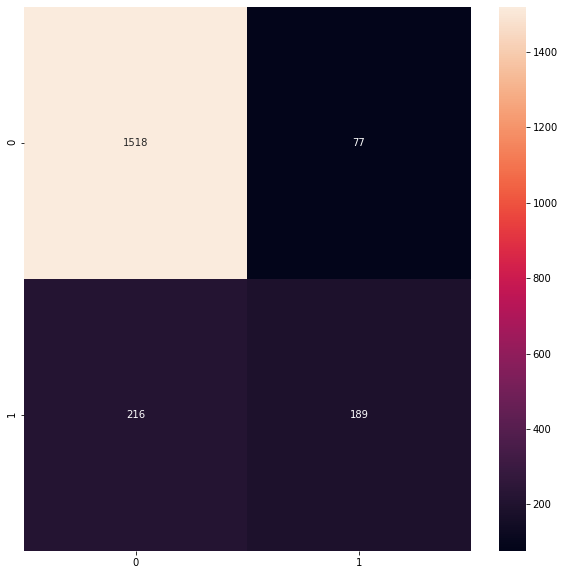

In [92]:
from sklearn.metrics import classification_report, confusion_matrix
cm =confusion_matrix(y_test,y_p)
plt.figure(figsize =(10,10))
sns.heatmap(cm,annot = True,fmt= 'd')

In [93]:
print(classification_report(y_test,y_p))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1595
           1       0.71      0.47      0.56       405

    accuracy                           0.85      2000
   macro avg       0.79      0.71      0.74      2000
weighted avg       0.84      0.85      0.84      2000



In [108]:
def ANN(X_train,y_train,X_test,y_test,loss,weights):
    model = keras.Sequential([
        keras.layers.Dense(8,input_shape = (11,),activation = 'relu'),
        keras.layers.Dense(4,activation = 'relu'),
        keras.layers.Dense(1,activation = 'sigmoid'),
        ])
    model.compile(optimizer = 'adam',loss = loss,metrics = ['accuracy'])

    if weights ==-1:
        model.fit(X_train,y_train,epochs =50)
    else:
        model.fit(X_train,y_train,epochs =50,class_weight =weights )
    print(model.evaluate(X_test,y_test))
    y_p  =model.predict(X_test)
    y_p = np.round(y_p)
    print('classification report: \n',classification_report(y_test,y_p))
    return y_p

In [98]:
df2.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited', 'Germany',
       'Spain'],
      dtype='object')

In [101]:
count_0,count_1 = df2.Exited.value_counts()
count_0,count_1

(7963, 2037)

In [111]:
df_0 = df2[df2.Exited == 0].sample(count_1)
df_1 = df2[df2.Exited == 1]
df_under = pd.concat([df_0,df_1],axis=0)
df_under.shape

(4074, 12)

In [109]:
X = df_under.drop('Exited',axis =1)
y = df_under.Exited
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15,stratify = y)
y_p = ANN(X_train,y_train,X_test,y_test,'binary_crossentropy',-1)

Epoch 1/50
102/102 [==============================] - 1s 2ms/step - loss: 0.6952 - accuracy: 0.5087
Epoch 2/50
102/102 [==============================] - 0s 2ms/step - loss: 0.6745 - accuracy: 0.6042
Epoch 3/50
102/102 [==============================] - 0s 2ms/step - loss: 0.6556 - accuracy: 0.6422
Epoch 4/50
102/102 [==============================] - 0s 2ms/step - loss: 0.6415 - accuracy: 0.6481
Epoch 5/50
102/102 [==============================] - 0s 2ms/step - loss: 0.6309 - accuracy: 0.6545
Epoch 6/50
102/102 [==============================] - 0s 2ms/step - loss: 0.6231 - accuracy: 0.6631
Epoch 7/50
102/102 [==============================] - 0s 2ms/step - loss: 0.6159 - accuracy: 0.6698
Epoch 8/50
102/102 [==============================] - 0s 2ms/step - loss: 0.6104 - accuracy: 0.6726
Epoch 9/50
102/102 [==============================] - 0s 2ms/step - loss: 0.6051 - accuracy: 0.6754
Epoch 10/50
102/102 [==============================] - 0s 2ms/step - loss: 0.6003 - accuracy: 0.6781

In [113]:
df_0 = df2[df2.Exited == 0]
df_1 = df2[df2.Exited == 1].sample(count_0,replace = True)
df_over = pd.concat([df_0,df_1],axis=0)
df_over.shape

(15926, 12)

In [114]:
X = df_over.drop('Exited',axis =1)
y = df_over.Exited
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15,stratify = y)
y_p = ANN(X_train,y_train,X_test,y_test,'binary_crossentropy',-1)

Epoch 1/50
399/399 [==============================] - 2s 2ms/step - loss: 0.7056 - accuracy: 0.4874
Epoch 2/50
399/399 [==============================] - 1s 2ms/step - loss: 0.6925 - accuracy: 0.5073
Epoch 3/50
399/399 [==============================] - 1s 2ms/step - loss: 0.6913 - accuracy: 0.5148
Epoch 4/50
399/399 [==============================] - 1s 2ms/step - loss: 0.6787 - accuracy: 0.5712
Epoch 5/50
399/399 [==============================] - 1s 2ms/step - loss: 0.6407 - accuracy: 0.6600
Epoch 6/50
399/399 [==============================] - 1s 2ms/step - loss: 0.6192 - accuracy: 0.6794
Epoch 7/50
399/399 [==============================] - 1s 2ms/step - loss: 0.6055 - accuracy: 0.6894
Epoch 8/50
399/399 [==============================] - 1s 2ms/step - loss: 0.5950 - accuracy: 0.6972
Epoch 9/50
399/399 [==============================] - 1s 2ms/step - loss: 0.5873 - accuracy: 0.7024
Epoch 10/50
399/399 [==============================] - 1s 2ms/step - loss: 0.5824 - accuracy: 0.7024

In [116]:
X = df2.drop('Exited',axis =1)
y = df2.Exited
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
X,y = smote.fit_resample(X,y)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15,stratify = y)
y_p = ANN(X_train,y_train,X_test,y_test,'binary_crossentropy',-1)

Epoch 1/50
399/399 [==============================] - 2s 2ms/step - loss: 0.6742 - accuracy: 0.5951
Epoch 2/50
399/399 [==============================] - 1s 2ms/step - loss: 0.6302 - accuracy: 0.6594
Epoch 3/50
399/399 [==============================] - 1s 2ms/step - loss: 0.5996 - accuracy: 0.6882
Epoch 4/50
399/399 [==============================] - 1s 2ms/step - loss: 0.5844 - accuracy: 0.6978
Epoch 5/50
399/399 [==============================] - 1s 2ms/step - loss: 0.5767 - accuracy: 0.7059
Epoch 6/50
399/399 [==============================] - 1s 2ms/step - loss: 0.5699 - accuracy: 0.7135
Epoch 7/50
399/399 [==============================] - 1s 2ms/step - loss: 0.5597 - accuracy: 0.7215
Epoch 8/50
399/399 [==============================] - 1s 2ms/step - loss: 0.5502 - accuracy: 0.7301
Epoch 9/50
399/399 [==============================] - 1s 2ms/step - loss: 0.5442 - accuracy: 0.7326
Epoch 10/50
399/399 [==============================] - 1s 2ms/step - loss: 0.5391 - accuracy: 0.7371

In [123]:
X = df2.drop('Exited',axis =1)
y = df2.Exited
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15,stratify = y)
df3 = X_train.copy()
df3['Exited'] = y_train

In [122]:
y_train.value_counts()

0    6370
1    1630
Name: Exited, dtype: int64

In [138]:
df_0 = df3[df3.Exited == 0]
df_1 = df3[df3.Exited == 1]

In [139]:
def get_train_batch(df_majority,df_minority,start,end):
    df_train = pd.concat([df_majority[start:end],df_minority],axis=0)
    X_train  =df_train.drop('Exited',axis=1)
    y_train = df_train.Exited
    return X_train,y_train

In [130]:
X_train,y_train = get_train_batch(df_0,df_1,0,1630)
yp1 = ANN(X_train,y_train,X_test,y_test,'binary_crossentropy',-1)

Epoch 1/50
102/102 [==============================] - 1s 2ms/step - loss: 0.6896 - accuracy: 0.5252
Epoch 2/50
102/102 [==============================] - 0s 1ms/step - loss: 0.6809 - accuracy: 0.5782
Epoch 3/50
102/102 [==============================] - 0s 2ms/step - loss: 0.6716 - accuracy: 0.6144
Epoch 4/50
102/102 [==============================] - 0s 2ms/step - loss: 0.6615 - accuracy: 0.6390
Epoch 5/50
102/102 [==============================] - 0s 2ms/step - loss: 0.6515 - accuracy: 0.6660
Epoch 6/50
102/102 [==============================] - 0s 2ms/step - loss: 0.6430 - accuracy: 0.6660
Epoch 7/50
102/102 [==============================] - 0s 2ms/step - loss: 0.6356 - accuracy: 0.6773
Epoch 8/50
102/102 [==============================] - 0s 2ms/step - loss: 0.6296 - accuracy: 0.6770
Epoch 9/50
102/102 [==============================] - 0s 1ms/step - loss: 0.6241 - accuracy: 0.6798
Epoch 10/50
102/102 [==============================] - 0s 850us/step - loss: 0.6191 - accuracy: 0.68

In [131]:
X_train,y_train = get_train_batch(df_0,df_1,1630,3260)
yp2 = ANN(X_train,y_train,X_test,y_test,'binary_crossentropy',-1)

Epoch 1/50
102/102 [==============================] - 1s 2ms/step - loss: 0.6819 - accuracy: 0.5644
Epoch 2/50
102/102 [==============================] - 0s 2ms/step - loss: 0.6613 - accuracy: 0.6178
Epoch 3/50
102/102 [==============================] - 0s 2ms/step - loss: 0.6363 - accuracy: 0.6454
Epoch 4/50
102/102 [==============================] - 0s 2ms/step - loss: 0.6151 - accuracy: 0.6727
Epoch 5/50
102/102 [==============================] - 0s 2ms/step - loss: 0.5997 - accuracy: 0.6819
Epoch 6/50
102/102 [==============================] - 0s 2ms/step - loss: 0.5899 - accuracy: 0.6926
Epoch 7/50
102/102 [==============================] - 0s 2ms/step - loss: 0.5847 - accuracy: 0.6988
Epoch 8/50
102/102 [==============================] - 0s 2ms/step - loss: 0.5788 - accuracy: 0.6994
Epoch 9/50
102/102 [==============================] - 0s 2ms/step - loss: 0.5752 - accuracy: 0.7052
Epoch 10/50
102/102 [==============================] - 0s 2ms/step - loss: 0.5703 - accuracy: 0.7113

In [134]:
X_train,y_train = get_train_batch(df_0,df_1,3260,4890)
yp3 = ANN(X_train,y_train,X_test,y_test,'binary_crossentropy',-1)

Epoch 1/50
102/102 [==============================] - 2s 2ms/step - loss: 0.6910 - accuracy: 0.5230
Epoch 2/50
102/102 [==============================] - 0s 2ms/step - loss: 0.6815 - accuracy: 0.5773
Epoch 3/50
102/102 [==============================] - 0s 2ms/step - loss: 0.6677 - accuracy: 0.6083
Epoch 4/50
102/102 [==============================] - 0s 2ms/step - loss: 0.6494 - accuracy: 0.6294
Epoch 5/50
102/102 [==============================] - 0s 2ms/step - loss: 0.6318 - accuracy: 0.6503
Epoch 6/50
102/102 [==============================] - 0s 2ms/step - loss: 0.6174 - accuracy: 0.6669
Epoch 7/50
102/102 [==============================] - 0s 2ms/step - loss: 0.6076 - accuracy: 0.6779
Epoch 8/50
102/102 [==============================] - 0s 2ms/step - loss: 0.5987 - accuracy: 0.6844
Epoch 9/50
102/102 [==============================] - 0s 2ms/step - loss: 0.5932 - accuracy: 0.6871
Epoch 10/50
102/102 [==============================] - 0s 2ms/step - loss: 0.5885 - accuracy: 0.6911

In [135]:
X_train,y_train = get_train_batch(df_0,df_1,4890,6370)
yp4 = ANN(X_train,y_train,X_test,y_test,'binary_crossentropy',-1)

Epoch 1/50
98/98 [==============================] - ETA: 0s - loss: 0.6885 - accuracy: 0.57 - 1s 2ms/step - loss: 0.6881 - accuracy: 0.5756
Epoch 2/50
98/98 [==============================] - 0s 2ms/step - loss: 0.6791 - accuracy: 0.6048
Epoch 3/50
98/98 [==============================] - 0s 2ms/step - loss: 0.6702 - accuracy: 0.6299
Epoch 4/50
98/98 [==============================] - 0s 2ms/step - loss: 0.6613 - accuracy: 0.6405
Epoch 5/50
98/98 [==============================] - 0s 2ms/step - loss: 0.6533 - accuracy: 0.6553
Epoch 6/50
98/98 [==============================] - 0s 2ms/step - loss: 0.6457 - accuracy: 0.6666
Epoch 7/50
98/98 [==============================] - 0s 2ms/step - loss: 0.6398 - accuracy: 0.6630
Epoch 8/50
98/98 [==============================] - 0s 2ms/step - loss: 0.6334 - accuracy: 0.6759
Epoch 9/50
98/98 [==============================] - 0s 2ms/step - loss: 0.6277 - accuracy: 0.6788
Epoch 10/50
98/98 [==============================] - 0s 2ms/step - loss: 0.6

In [140]:
y_f = yp1.copy()
for i in range(len(yp1)):
    n= yp1[i]+yp2[i]+yp3[i]
    if n>1:
        y_f[i] = 1
    else:
        y_f[i]= 0

In [141]:
print(classification_report(y_test,y_f))

              precision    recall  f1-score   support

           0       0.92      0.73      0.81      1593
           1       0.42      0.75      0.54       407

    accuracy                           0.73      2000
   macro avg       0.67      0.74      0.68      2000
weighted avg       0.82      0.73      0.76      2000

